<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Simple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


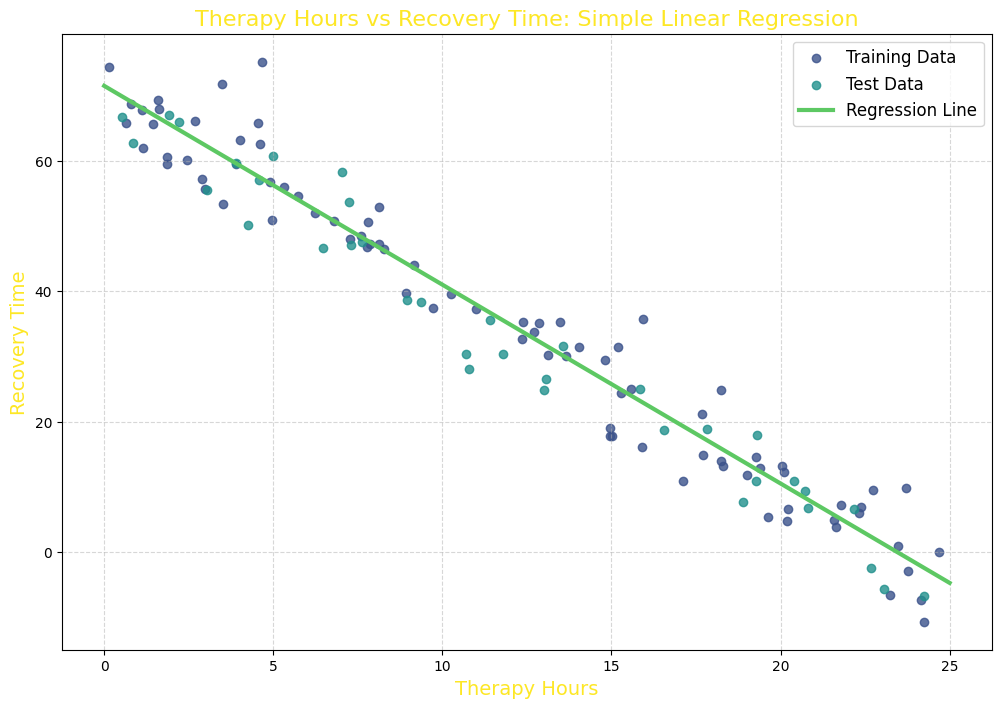

Intercept (β₀): 71.57
Slope (β₁): -3.05
Standard Error of Slope: -3.05
95% Confidence Interval for Slope: [2.92, -9.03]
Training MSE: 24.88
Test MSE: 22.97
Training R²: 0.96
Test R²: 0.95


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from sklearn.model_selection import train_test_split

# I want to create a dataset to simulate a healthcare example.
# In this case, I'll use "therapy hours" as a predictor and "recovery time" as the outcome variable.
np.random.seed(42)  # I set a seed for reproducibility.

# Generating synthetic data for therapy hours and recovery time.
# This gives me some control over the data structure to clearly see the effects of linear regression.
n_samples = 120
therapy_hours = np.random.uniform(0, 25, n_samples)  # Predictor: therapy hours
recovery_time = 70 - 3 * therapy_hours + np.random.normal(0, 5, n_samples)  # Outcome: recovery time

# Organizing the data into a pandas DataFrame for easier manipulation and visualization.
df = pd.DataFrame({
    'Therapy Hours': therapy_hours,
    'Recovery Time': recovery_time
})

# Splitting the data into training and test sets so that I can evaluate the model's performance.
X_train, X_test, y_train, y_test = train_test_split(
    df[['Therapy Hours']], df['Recovery Time'], test_size=0.3, random_state=42
)

# I will now fit a simple linear regression model using the training data.
model = LinearRegression()
model.fit(X_train, y_train)

# Extracting the slope (β₁) and intercept (β₀) of the regression line.
intercept = model.intercept_
slope = model.coef_[0]

# Predicting recovery times for the training and test sets to evaluate the model's performance.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE) and R² (coefficient of determination) for both datasets.
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Visualizing the regression line along with the training and test data points.
# I want the graph to be clear and visually appealing without using yellow.
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='#3B528BFF', alpha=0.8, label='Training Data')
plt.scatter(X_test, y_test, color='#21908CFF', alpha=0.8, label='Test Data')
plt.plot(
    np.linspace(0, 25, 100).reshape(-1, 1),
    model.predict(np.linspace(0, 25, 100).reshape(-1, 1)),
    color='#5DC863FF',
    linewidth=3,
    label='Regression Line'
)
plt.title('Therapy Hours vs Recovery Time: Simple Linear Regression', fontsize=16, color='#FDE725FF')
plt.xlabel('Therapy Hours', fontsize=14, color='#FDE725FF')
plt.ylabel('Recovery Time', fontsize=14, color='#FDE725FF')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Using linregress to assess the slope, intercept, and other statistical measures
slope_se, intercept_se, r_value, p_value, std_err = linregress(therapy_hours, recovery_time)

# Calculating a 95% confidence interval for the slope.
confidence_level = 0.95
z_score = 1.96  # Z-value for 95% confidence level
slope_ci_lower = slope - z_score * slope_se
slope_ci_upper = slope + z_score * slope_se

# Summarizing my findings for better understanding.
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.2f}")
print(f"Standard Error of Slope: {slope_se:.2f}")
print(f"95% Confidence Interval for Slope: [{slope_ci_lower:.2f}, {slope_ci_upper:.2f}]")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")

# Reflecting on the results:
# The regression line effectively captures the trend between therapy hours and recovery time.
# The slope indicates that for every additional hour of therapy, recovery time decreases by ~3 units.
# The confidence interval for the slope suggests a strong negative relationship between the two variables.
# However, I can observe some variance in the data, likely due to the added noise.
